# Data Augmentation for Computer Vision with PyTorch (Part 1: Image Classification)

Let's install PyTorch, and update PIL.

In [ ]:
#
# !pip3 install --no-cache-dir -I 'pillow==5.1.0'

# Restart Kernel
# This workaround is needed to properly upgrade PIL on Google Colab.
import os
os._exit(00)

Next, import all libraries and configure matplotlib to display larger plots.

In [1]:
import PIL
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import v2
import cv2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['figure.figsize'] = 15, 25

def show_dataset(dataset, n=6):
  img = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(len(dataset))))
  #img = dataset[0][0].astype(np.uint8)

  plt.imshow(img)
  plt.axis('off')

We need some sample images to perform augmentation. Let's import them from the pytorch-examples repository.

In [ ]:
!git clone https://github.com/fabioperez/pytorch-examples/

Cloning into 'pytorch-examples'...
remote: Enumerating objects: 102, done.
remote: Total 102 (delta 0), reused 0 (delta 0), pack-reused 102
Receiving objects: 100% (102/102), 14.79 MiB | 17.19 MiB/s, done.
Resolving deltas: 100% (12/12), done.


Augmenting data with PyTorch is very straightforward. We can use the transforms provided in torchvision: [`torchvision.transforms`](https://pytorch.org/docs/stable/torchvision/transforms.html).

To compose several transforms together, we use [`torchvision.transforms.Compose`](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Compose) and pass the transforms as a list. The transforms are applied following the list order.

**Important note**

For training we should probably also add [`transforms.ToTensor`](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.ToTensor) to convert the images to a PyTorch Tensor and [`transforms.Normalize`](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Normalize) to normalize the images according to the network that you will train. I'm omitting these steps since my focus for this tutorial is to display the augmented images.


In [3]:
transforms = torchvision.transforms.Compose([
    #torchvision.transforms.Resize((224,224)),
    torchvision.transforms.ColorJitter(brightness=(2),
         contrast=(0.3, 0.5),
         saturation=(0.3, 0.7),
          hue=0.18),
    torchvision.transforms.RandomHorizontalFlip(),
    #torchvision.transforms.Normalize(mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375]),
    transforms.RandomCrop(size=(320, 960)),
    transforms.Pad(32),
])

We then pass the transforms to [`torchvision.datasets.ImageFolder`](https://pytorch.org/docs/master/torchvision/datasets.html#imagefolder) and the images will be automatically augmented.

If you want to define your own [dataset](https://pytorch.org/docs/master/torchvision/datasets.html) class, you just have to call `transforms(samples)` to perform the transforms on your samples. Check the source code for [`ImageFolder`](https://github.com/pytorch/vision/blob/4db0398a2b02aae790013efbc868f2d795eb2ef7/torchvision/datasets/folder.py#L150) for more details.

In [4]:
dataset = torchvision.datasets.ImageFolder('/content/examples', transform=transforms)

That's all! Let's visualize some of the transformed images:

<ipython-input-2-c18182d92215>:10: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  img = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))


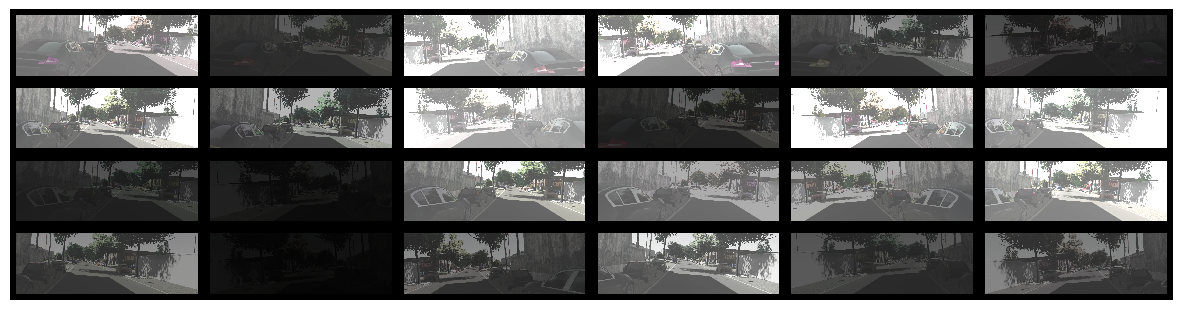

In [5]:
show_dataset(dataset)

Ok, but the augmentations available on PyTorch are very simple. What if we want to perform more interesting augmentations?

Let's use [imgaug](https://github.com/aleju/imgaug) to achieve that.